In [4]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [5]:
train_path = 'data/train'
valid_path = 'data/valid'
test_path = 'data/test'

In [6]:
train_batches = ImageDataGenerator().flow_from_directory(directory=train_path, target_size=(224,224),
    classes=['Covid', 'Normal'], batch_size=7)
valid_batches = ImageDataGenerator().flow_from_directory(directory=valid_path, target_size=(224,224),
    classes=['Covid', 'Normal'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(directory=test_path, target_size=(224,224),
    classes=['Covid', 'Normal'], batch_size=4)

Found 42 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [7]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [8]:
imgs, labels = next(train_batches)

C:\Users\Akash Selvakumar\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


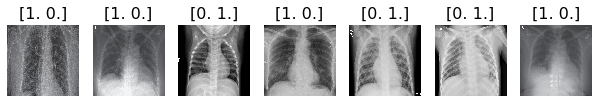

In [9]:
plots(imgs, titles=labels)

In [10]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)),
    Flatten(),
    Dense(2, activation='softmax'),
    ])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit_generator(generator=train_batches, steps_per_epoch=3, 
    validation_data=valid_batches, validation_steps=3, epochs=5, verbose=2)

Epoch 1/5
 - 3s - loss: 1580.5094 - accuracy: 0.5238 - val_loss: 67.7461 - val_accuracy: 0.5000
Epoch 2/5
 - 3s - loss: 1330.0709 - accuracy: 0.5238 - val_loss: 1677.6112 - val_accuracy: 0.5833
Epoch 3/5
 - 2s - loss: 822.4502 - accuracy: 0.6190 - val_loss: 332.1532 - val_accuracy: 0.5000
Epoch 4/5
 - 2s - loss: 475.4127 - accuracy: 0.8095 - val_loss: 978.9091 - val_accuracy: 0.5833
Epoch 5/5
 - 1s - loss: 1400.9581 - accuracy: 0.5714 - val_loss: 137.0683 - val_accuracy: 0.5833


In [64]:
test_imgs, test_labels = next(test_batches)

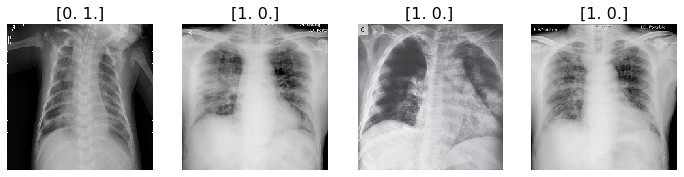

In [65]:
plots(test_imgs, titles=test_labels)

In [66]:
test_labels = test_labels[:,0]

In [67]:
test_labels

array([0., 1., 1., 1.], dtype=float32)

In [68]:
predictions = model.predict_generator(generator=test_batches, steps=1, verbose=0)

In [69]:
predictions

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [70]:
cm = confusion_matrix(y_true=test_labels, y_pred=np.round(predictions[:,0]))

In [71]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1 0]
 [0 3]]


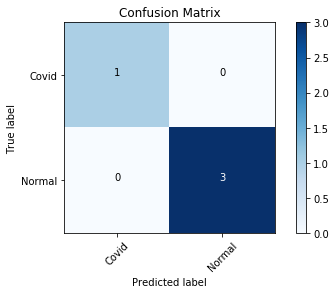

In [73]:
cm_plot_labels = ['Covid','Normal']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [76]:
model.save("cnn_basic.h5")

In [77]:
model.save("basic_cnn_model.hdf5")

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0
